<a id="sec1"></a>

<div style="background-image: url('https://images.pexels.com/photos/2129796/pexels-photo-2129796.png?auto=compress&cs=tinysrgb&w=900'); background-size: cover; color: orange; padding: 2px 25px 0px 20px; text-align: center; font-family: 'Arial Black', sans-serif; font-size: 38px; text-shadow: 3px 3px 4px #000000;">
    <h1>Title: SMS/Email Spam Detection</h1>
</div>


`Author`: Abdullah Khan Kakar [GitHub](https://github.com/AbdullahKhanKakar) [LinkedIn](https://www.linkedin.com/in/abdullahkhankakar/) [Kaggle](https://www.kaggle.com/abdullahkhanuet22)

# Table of Content:

1. [Data Cleaning](#sec1)
2. [EDA](#sec2)
3. [Text Preprocessing](#sec3)
4. [Model Building](#sec4)

In [184]:
import pandas as pd
import numpy as np

import nltk

In [185]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [186]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


<a id="sec1"></a>

<div style="background-image: url('https://images.pexels.com/photos/2129796/pexels-photo-2129796.png?auto=compress&cs=tinysrgb&w=900'); background-size: cover; color: orange; padding: 2px 25px 0px 20px; text-align: center; font-family: 'Arial Black', sans-serif; font-size: 38px; text-shadow: 3px 3px 4px #000000;">
    <h1>1.Data Cleaning</h1>
</div>


In [187]:
df.shape

(5572, 5)

In [188]:
# drop last 3 columns; which are not usefull
df = df[["v1","v2"]]

In [189]:
# rename columns names
df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)

In [190]:
# label encoding target column
df["target"] = df["target"].map({"ham":0, "spam":1})

In [191]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [192]:
# checking null values exist in dataframe
df.isnull().sum()

target    0
text      0
dtype: int64

In [193]:
# checking duplicated rows or records in dataframe
df.duplicated().sum()

403

In [195]:
# There are 403 duplicated rows in dataframe, so remove duplicates
df.drop_duplicates(inplace=True, keep="first")

In [196]:
df.shape

(5169, 2)

<a id="sec2"></a>

<div style="background-image: url('https://images.pexels.com/photos/2129796/pexels-photo-2129796.png?auto=compress&cs=tinysrgb&w=900'); background-size: cover; color: orange; padding: 2px 25px 0px 20px; text-align: center; font-family: 'Arial Black', sans-serif; font-size: 38px; text-shadow: 3px 3px 4px #000000;">
    <h1>2.EDA</h1>
</div>

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

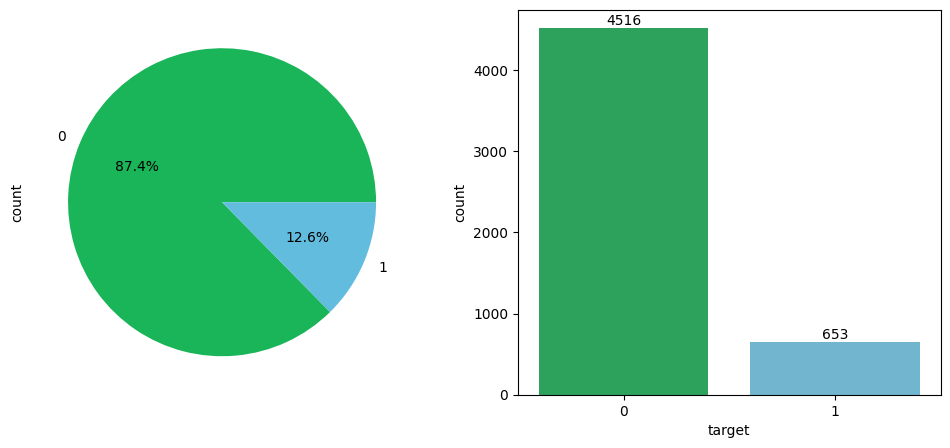

In [198]:
# ploting target column
figure, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

custom_colors = ["#19b558", "#62bcde"]
df["target"].value_counts().plot(kind="pie", autopct="%.1f%%", colors = custom_colors, ax=ax1)
fig = sns.countplot(x=df["target"], palette=custom_colors, ax=ax2)
for bar in fig.containers:
    fig.bar_label(bar)

plt.show()

### Note:


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
    <p style="font-family: Arial, sans-serif; font-size: 16px; color: #333333; text-align: justify;">
       From the above plot, we can see that 1(spam) category is very minimum as compared to 0(ham) category. It shows data is <b>imbalanced</b>.
    </p>
</div>


Now we are going to make 3 `new` columns:

1. Number of Characters
2. Number of Words
3. Number of Sentences

In [199]:
# number of characters
df["num_characters"] = df["text"].apply(len)

In [200]:
# number of words
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [201]:
# number of sentences
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [202]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [203]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [204]:
# ham emails/messages
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [205]:
# spam emails/messages
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


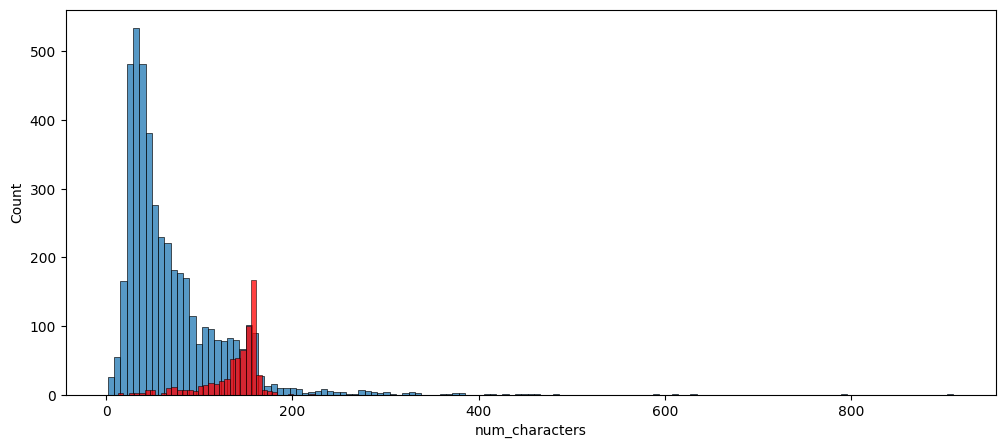

In [206]:
# ploting: number of characters in spam and ham emails
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"], color="red")
plt.show()

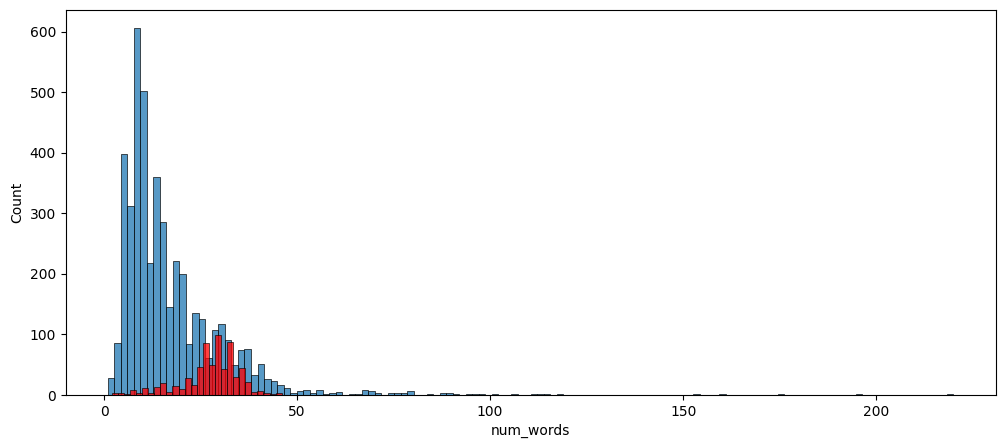

In [207]:
# ploting: number of words in spam and ham emails
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="red")
plt.show()

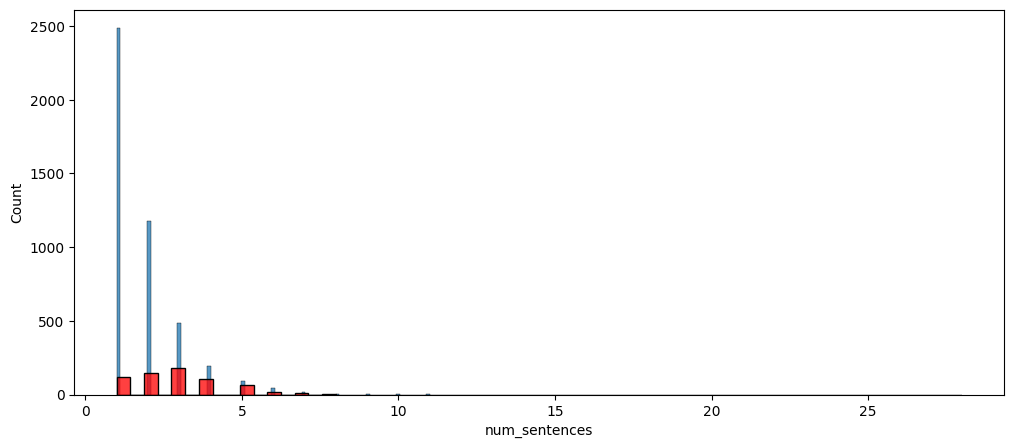

In [208]:
# ploting: number of sentences in spam and ham emails
plt.figure(figsize=(12,5))
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"], color="red")
plt.show()

C:\Users\DELL PC\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


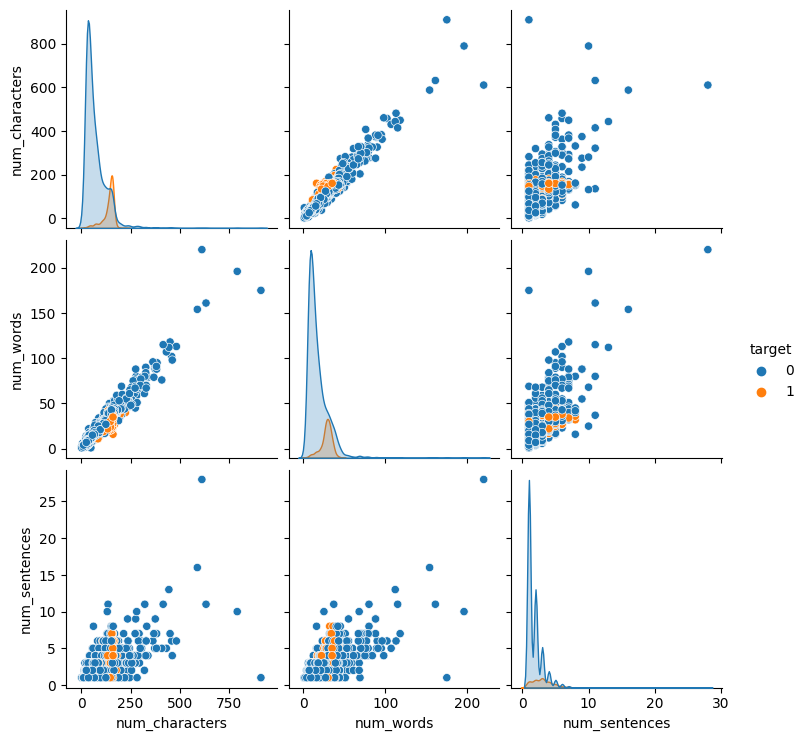

In [209]:
# ploting pairplot to see relationship between new columns
sns.pairplot(df, hue="target")

<Axes: >

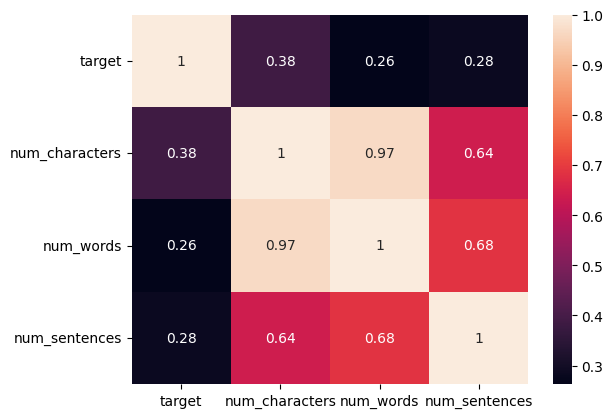

In [210]:
# correlation heatmap
sns.heatmap(df.select_dtypes(["int"]).corr(), annot=True)

### Note:


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
    <p style="font-family: Arial, sans-serif; font-size: 16px; color: #333333; text-align: justify;">
       New columns such as number of characters, words and sentences have strong relationship between them that shows there is <b>High Multicollinearity</b> between these columns. So, we will not use these columns or features in <b>Model Training</b> but will perform analysis through these features.
    </p>
</div>


<a id="sec3"></a>

<div style="background-image: url('https://images.pexels.com/photos/2129796/pexels-photo-2129796.png?auto=compress&cs=tinysrgb&w=900'); background-size: cover; color: orange; padding: 2px 25px 0px 20px; text-align: center; font-family: 'Arial Black', sans-serif; font-size: 38px; text-shadow: 3px 3px 4px #000000;">
    <h1>3.Text Preprocessing</h1>
</div>

Here are the tasks performed in `text preprocessing`:

- Lowercase
- Tokenization
- Removing Special Characters
- Removing stop words and punctuation
- Stemming

In [211]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [212]:
def transform_text(text):
    # 01: transforming text into lower case
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    # 02: getting alphnumeric content from text
    y = []
    for word in text:
        if word.isalnum():
            y.append(word)
    
    # 03: removing stop words and punction marks from text
    text = y[:]
    y.clear()
    for word in text:
        if word not in stopwords.words("english") and word not in string.punctuation:
            y.append(word)
            
    # 04: apply stemming 
    text = y[:]
    y.clear()
    for word in text:
        y.append(PorterStemmer().stem(word))
    
    return " ".join(y)

In [213]:
# testing the function
transform_text("ALi is goods goods how where boy's# ;$# ... >>(a)// !")

'ali good good boy'

In [214]:
df["transformed_text"] = df["text"].apply(transform_text)

In [215]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [216]:
# Performing analysis on ham and spam emails separately to see common and repeating words through Word Cloud
from wordcloud import WordCloud

wc = WordCloud(width=600, height=500, min_font_size=12, background_color="white")

In [217]:
# for ham emails/messages
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

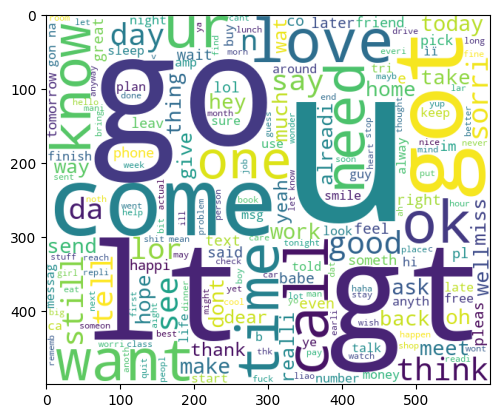

In [218]:
plt.imshow(ham_wc)

In [219]:
# for spam emails/messages
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

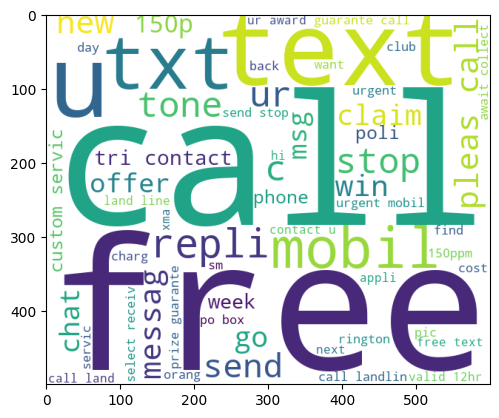

In [220]:
plt.imshow(spam_wc)

In [222]:
# ploting top repeated words
from collections import Counter

In [223]:
def top_words(target):
    words = []
    for msg in df[df["target"] == target]["transformed_text"].tolist():
        for word in msg.split():
            words.append(word)
            
    sns.barplot(x=pd.DataFrame(Counter(words).most_common(30))[0], y=pd.DataFrame(Counter(words).most_common(30))[1])
    plt.xticks(rotation="vertical")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

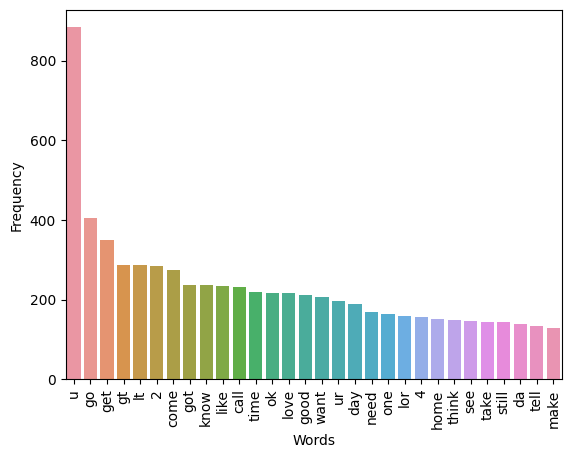

In [224]:
top_words(0)

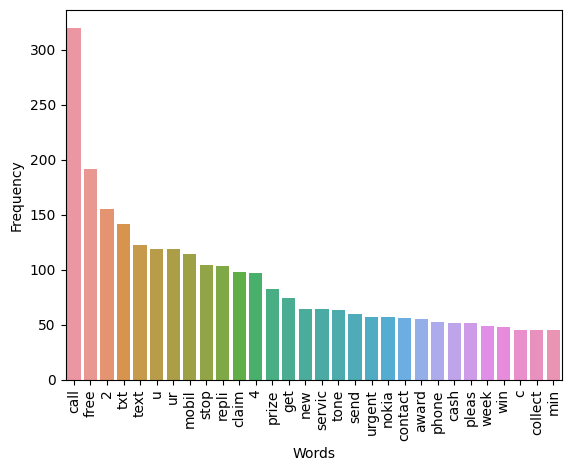

In [225]:
top_words(1)

<a id="sec4"></a>

<div style="background-image: url('https://images.pexels.com/photos/2129796/pexels-photo-2129796.png?auto=compress&cs=tinysrgb&w=900'); background-size: cover; color: orange; padding: 2px 25px 0px 20px; text-align: center; font-family: 'Arial Black', sans-serif; font-size: 38px; text-shadow: 3px 3px 4px #000000;">
    <h1>4.Model Building</h1>
</div>

In [226]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [227]:
# Using TF-IDF vectorizer
tf_idf = TfidfVectorizer(max_features=3500)

In [228]:
x = tf_idf.fit_transform(df["transformed_text"]).toarray()

In [229]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [230]:
y = df["target"].values

In [231]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [232]:
x.shape, y.shape

((5169, 3500), (5169,))

In [234]:
# splitting data into training and testing
from sklearn.model_selection import train_test_split

In [235]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [236]:
# importing algorithms
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

### Note:


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
    <p style="font-family: Arial, sans-serif; font-size: 16px; color: #333333; text-align: justify;">
        I tried many algorithms such as <b>Logistic Regression, Random Forest Classifier, Decision Tree Classifier, KNeighbors Classifier, SVC(Support Vector Classifier), Adaboost Classifier, Extra Trees Classifier, XGBClassifier, LightGBM Classifier, Naive Bayes and Gradient Boosting Classifier</b> etc. But from all these algorithms only Naive Bayes algorithm was performing well. Then I write code below to test Naive Bayes algorithms. You can try all algorithms.
    </p>
</div>


In [237]:
for model in [GaussianNB(), MultinomialNB(), BernoulliNB()]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"{model}")
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
    print(f"Precision Score: {precision_score(y_test, y_pred)}")
    print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred)}")
    print("\n===================\n")
    

GaussianNB()
Accuracy Score: 0.8713733075435203
Precision Score: 0.5336134453781513
Confusion Matrix : 
[[774 111]
 [ 22 127]]


MultinomialNB()
Accuracy Score: 0.9642166344294004
Precision Score: 1.0
Confusion Matrix : 
[[885   0]
 [ 37 112]]


BernoulliNB()
Accuracy Score: 0.9748549323017408
Precision Score: 1.0
Confusion Matrix : 
[[885   0]
 [ 26 123]]




### Note:


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
    <p style="font-family: Arial, sans-serif; font-size: 16px; color: #333333; text-align: justify;">
        From <b>Naive Bayes</b> algorithms, only <b>MultinomialNB()</b> algorithm performs well. So we will use this model in production part.
    </p>
</div>


In [239]:
# test selected model accuracy
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9642166344294004
1.0


In [171]:
# importing important files through Pickle for using in Production and Deployment
import pickle

pickle.dump(tf_idf, open("vectorizer.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))

<p style="color:Blue; font-weight:900;">End of Code!</p>